In [ ]:
cd /files_for_calculating_gradients_group

In [1]:
import scipy as scipy
import scipy.cluster as scipycluster
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import metrics
import sklearn
import seaborn as sns

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


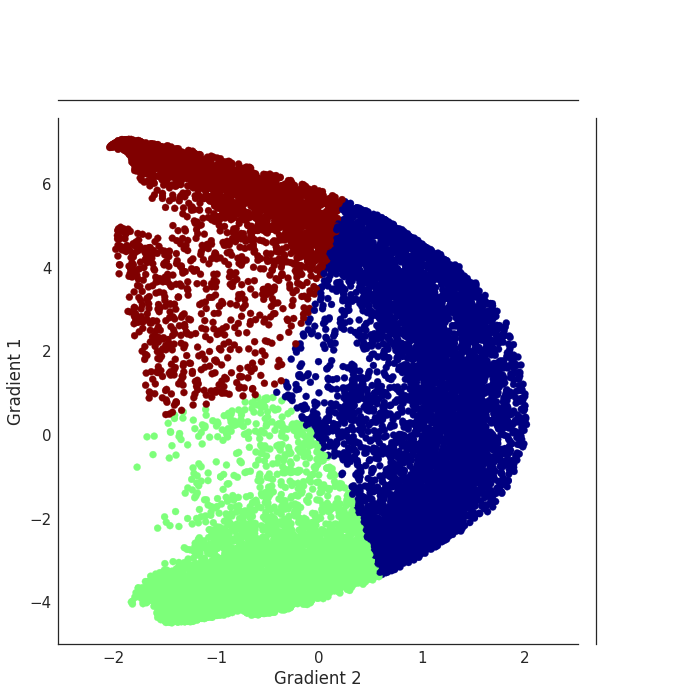

In [11]:
### Spectral clustering

res = nib.load('result_cerebellumonly.dscalar.nii').get_data()
res.shape = (8, 18142)

sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)
res_component1 = res[0]
res_component2 = res[1]
df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)

data = (StandardScaler().fit_transform(res[[0, 1], :].T)) # with normalization
cls = sklearn.cluster.SpectralClustering(n_clusters=3, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, n_jobs=1).fit(data)
cls.fit(data)

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

res_component1 = res[0]
res_component2 = res[1]
df = pd.DataFrame()

df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)

import matplotlib.cm as cm
sns.set_context(font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001})
g = (sns.jointplot('e0', 'e1', 
                   data=df,
                   size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', # alpha=0.8,
                   ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], 
                   xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], 
                   stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1'))
g.ax_joint.scatter(df.e1, df.e0, c=cls.labels_, cmap ='jet')
g.savefig(os.path.abspath('figure.png'), format='png', dpi=600, transparent=False)
plt.show()

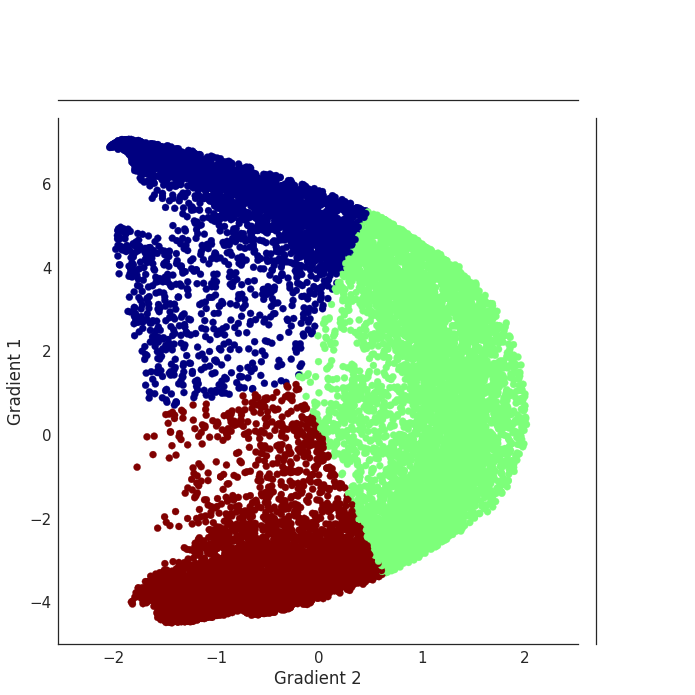

In [12]:
### K-means clustering

res = nib.load('result_cerebellumonly.dscalar.nii').get_data()
res.shape = (8, 18142)
from sklearn import metrics
import sklearn
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

res_component1 = res[0]
res_component2 = res[1]
df = pd.DataFrame()

df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)

cls = KMeans(n_clusters=3)
cls.fit(StandardScaler().fit_transform(res[[0, 1], :].T))

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

res_component1 = res[0]
res_component2 = res[1]
df = pd.DataFrame()

df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)

import matplotlib.cm as cm
sns.set_context(font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001})
g = (sns.jointplot('e0', 'e1', 
                   data=df,
                   size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', # alpha=0.8,
                   ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], 
                   xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], 
                   stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1'))
g.ax_joint.scatter(df.e1, df.e0, c=cls.labels_, cmap ='jet')
g.savefig(os.path.abspath('figure.png'), format='png', dpi=600, transparent=False)
plt.show()